<a href="https://colab.research.google.com/github/geffenmoser/tta-exercises-post-week-7--6-24/blob/main/week11day4dc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import zipfile
import pandas as pd

with zipfile.ZipFile('global_power_plant_database_v_1_3.zip', 'r') as zip_ref:
    zip_ref.extractall()

df = pd.read_csv('global_power_plant_database.csv')

<ipython-input-1-dc888d4ec40e>:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


In [2]:
print(df.head())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

In [3]:
df.info()
df.isnull().sum()
duplicated = df.duplicated(keep='first')
print(duplicated[duplicated == True])
df.drop_duplicates(inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

,0
country,0
country_long,0
name,0
gppd_idnr,0
capacity_mw,0
latitude,0
longitude,0
primary_fuel,0
other_fuel1,32992
other_fuel2,34660


In [6]:
df['estimated_generation_note_2013'] = pd.to_numeric(df['estimated_generation_note_2013'], errors='coerce')
df['estimated_generation_note_2014'] = pd.to_numeric(df['estimated_generation_note_2014'], errors='coerce')
df['estimated_generation_note_2015'] = pd.to_numeric(df['estimated_generation_note_2015'], errors='coerce')
df['estimated_generation_note_2016'] = pd.to_numeric(df['estimated_generation_note_2016'], errors='coerce')
df['estimated_generation_note_2017'] = pd.to_numeric(df['estimated_generation_note_2017'], errors='coerce')



0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: estimated_generation_note_2013, dtype: float64


In [7]:
# Summarize key statistics for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
summary_stats = df[numerical_cols].describe()
print(summary_stats)

# Explore distribution of power plants by country and fuel type
country_fuel_distribution = df.groupby(['country_long', 'primary_fuel'])['name'].count().reset_index(name='count')
print(country_fuel_distribution)

        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min              2000.000000          -947.600000          -989.

In [8]:
import scipy.stats as stats

df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')

# Group data by fuel type and calculate statistics for capacity_mw
fuel_stats = df.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std'])

# Perform ANOVA test to compare means of capacity_mw across different fuel types
fuel_groups = [df['capacity_mw'][df['primary_fuel'] == fuel] for fuel in df['primary_fuel'].unique()]
fvalue, pvalue = stats.f_oneway(*fuel_groups)

print(f"Capacity Statistics by Fuel Type:\n{fuel_stats}")
print(f"\nANOVA Test Results:")
print(f"F-value: {fvalue:.2f}")
print(f"P-value: {pvalue:.3f}")

# Post-hoc tests (Tukey's HSD) to identify specific differences between fuel types
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(df['capacity_mw'], df['primary_fuel'])
print(f"\nTukey's HSD Post-Hoc Test:\n{tukey_result}")

Capacity Statistics by Fuel Type:
                       mean      median          std
primary_fuel                                        
Biomass           23.972938     9.45000    39.461805
Coal             843.579828   600.00000   888.187187
Cogeneration      98.731707    31.90000   283.428252
Gas              373.449375   147.50000   560.934146
Geothermal        67.130952    30.00000   114.640890
Hydro            147.171551    20.00000   549.809328
Nuclear         2091.855179  1888.00000  1303.509273
Oil              112.878754     9.00000   392.009039
Other             84.020000    40.00000   145.891392
Petcoke          202.048125    65.48875   476.986459
Solar             17.657039     5.80000    41.939412
Storage           12.683704     4.90000    35.574631
Waste             13.809657     4.80000    20.582503
Wave and Tidal    55.220000     5.00000   101.440708
Wind              49.224126    27.00000   106.138355

ANOVA Test Results:
F-value: 967.46
P-value: 0.000


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,



Tukey's HSD Post-Hoc Test:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1         group2      meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------
       Biomass           Coal   819.6069    0.0   772.2455   866.9683   True
       Biomass   Cogeneration    74.7588 0.9985  -148.5588   298.0763  False
       Biomass            Gas   349.4764    0.0   306.0347   392.9182   True
       Biomass     Geothermal     43.158 0.9917   -65.9611   152.2772  False
       Biomass          Hydro   123.1986    0.0    82.3602    164.037   True
       Biomass        Nuclear  2067.8822    0.0  1960.2561  2175.5084   True
       Biomass            Oil    88.9058    0.0    41.5056    136.306   True
       Biomass          Other    60.0471 0.9998  -158.1634   278.2576  False
       Biomass        Petcoke   178.0752 0.9794  -230.6209   586.7713  False
       Biomass          Solar    -6.3159    1.0 

<ipython-input-12-c368f6481267>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


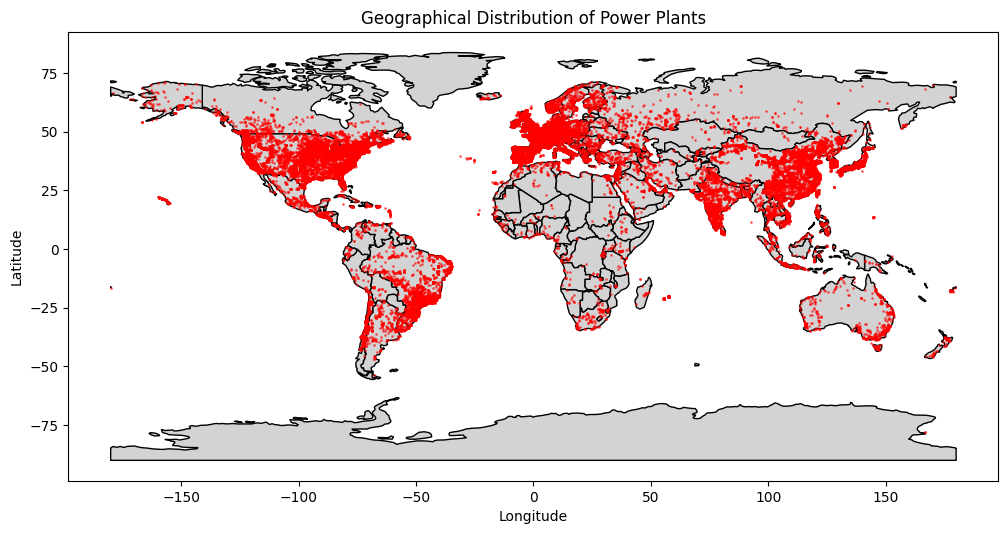

In [12]:
!pip install geopandas matplotlib
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

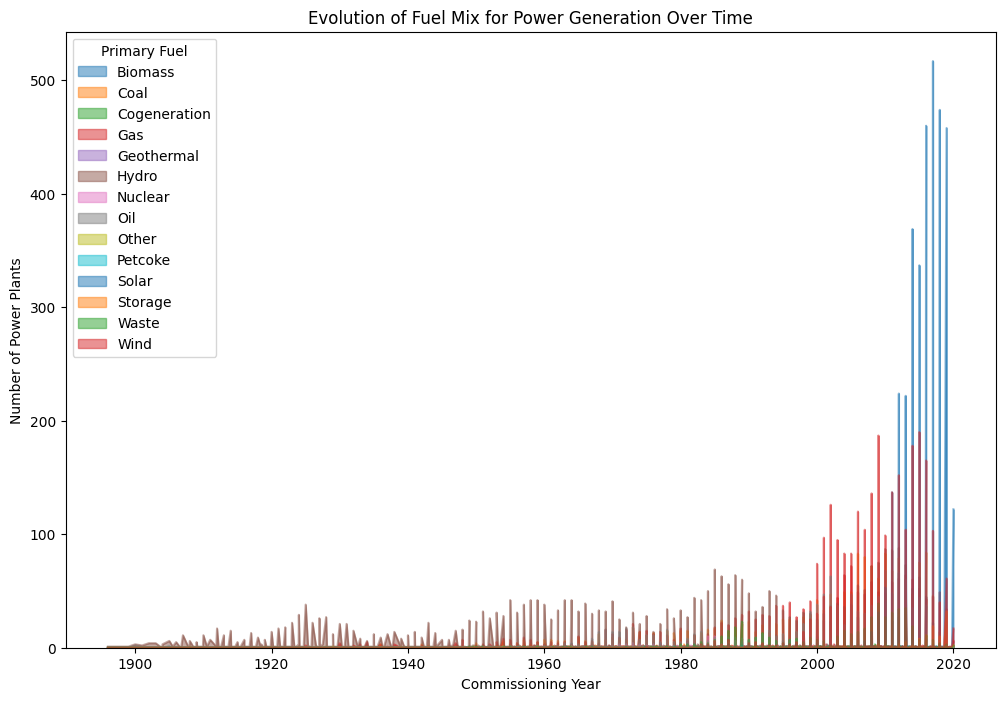

<ipython-input-14-7fa0e5178d99>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes['capacity_mw'].fillna(attributes['capacity_mw'].median(), inplace=True)


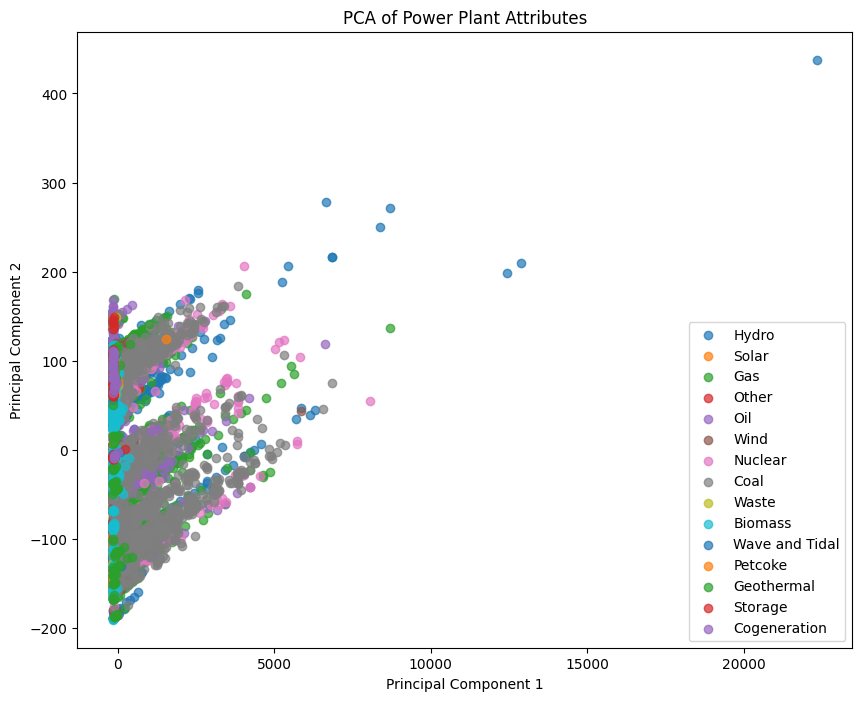

Covariance Matrix:
[[ 2.39743483e+05 -1.46512725e+02  5.81707732e+03 -5.70535451e+00
   4.53677832e+01 -7.58425952e-02  2.40434155e+01 -5.20577443e-01
  -3.31500840e+00  1.07644914e+01 -3.35208912e+00 -9.76502465e-02
   1.32908466e-02 -4.44788988e+01 -5.82242592e-01 -4.57176425e+00
  -3.09532411e-02 -1.74585997e+01]
 [-1.46512725e+02  5.12506327e+02 -1.21328995e+02 -5.16553820e-01
  -4.37421144e-04  6.58447093e-03 -1.11132236e-01 -1.76234135e-02
  -5.08434124e-01  3.20927359e-02 -1.22232779e+00  7.67473646e-03
  -7.01303604e-04  1.49464462e+00  3.49582549e-02  1.95846455e-01
   5.77623965e-03  5.99632593e-01]
 [ 5.81707732e+03 -1.21328995e+02  6.14747738e+03 -9.97931668e-01
   4.58616339e+00 -8.87369734e-02 -2.00755654e+00 -3.05683435e-02
   3.08970316e-01  6.46993113e-02 -2.45988512e+00 -3.90021113e-02
  -2.92406000e-02  1.89019172e+00 -2.74185091e-01 -9.82502673e-01
   2.92773817e-03  5.66566379e-02]
 [-5.70535451e+00 -5.16553820e-01 -9.97931668e-01  3.92576858e-02
  -2.72997099e-03 

In [14]:
# Convert commissioning_year to numeric, coerce non-numeric values to NaN
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')

# Group data by commissioning year and primary fuel, count plants
fuel_mix_by_year = df.groupby(['commissioning_year', 'primary_fuel'])['name'].count().reset_index(name='count')

# Pivot table for easier plotting
fuel_mix_pivot = fuel_mix_by_year.pivot(index='commissioning_year', columns='primary_fuel', values='count')

# Plotting the evolution of fuel mix
fuel_mix_pivot.plot(kind='area', stacked=False, figsize=(12, 8))
plt.title('Evolution of Fuel Mix for Power Generation Over Time')
plt.xlabel('Commissioning Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Primary Fuel')
plt.show()

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

attributes = df[['capacity_mw', 'primary_fuel', 'latitude', 'longitude']]

# Handle missing values (replace with median for capacity)
attributes['capacity_mw'].fillna(attributes['capacity_mw'].median(), inplace=True)

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_fuel = encoder.fit_transform(attributes[['primary_fuel']])
# Use 'primary_fuel' to match the fitted column name
encoded_fuel_df = pd.DataFrame(encoded_fuel, columns=encoder.get_feature_names_out(['primary_fuel']))

# Create a numerical matrix
numerical_attributes = pd.concat([attributes[['capacity_mw', 'latitude', 'longitude']], encoded_fuel_df], axis=1)

# Center the data (subtract mean)
centered_data = numerical_attributes - numerical_attributes.mean()

# Calculate the covariance matrix
covariance_matrix = np.cov(centered_data, rowvar=False)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(centered_data)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['primary_fuel'] = df['primary_fuel']

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for fuel_type in pca_df['primary_fuel'].unique():
    subset = pca_df[pca_df['primary_fuel'] == fuel_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=fuel_type, alpha=0.7)
plt.title('PCA of Power Plant Attributes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Analyze covariance matrix and PCA results to understand relationships
print(f"Covariance Matrix:\n{covariance_matrix}")
print(f"\nPCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

    country country_long               name   gppd_idnr  capacity_mw  \
36      DZA      Algeria     Hadjret Ennous  WRI1023768       1200.0   
49      DZA      Algeria  Koudiet Eddraouch  WRI1023769       1200.0   
68      DZA      Algeria              Terga  WRI1023770       1200.0   
141     ARG    Argentina          COSTANERA  ARG0000046       1982.2   
274     ARG    Argentina       NUEVO PUERTO  ARG0000044       1217.7   

     latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
36    36.5767     2.0797          Gas         Oil         NaN  ...   
49    36.8850     8.0778          Gas         NaN         NaN  ...   
68    35.4608    -1.2295          Gas         NaN         NaN  ...   
141  -34.6260   -58.3393         Coal         Gas       Other  ...   
274  -34.5721   -58.3835          Gas        Coal       Other  ...   

    estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
36                            NaN                            NaN   
49        

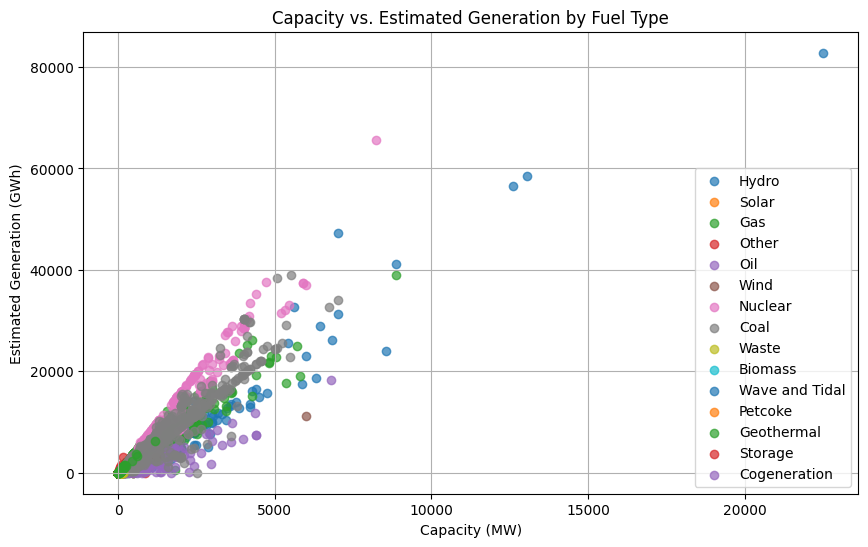

<ipython-input-17-c3bfb0e3df38>:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


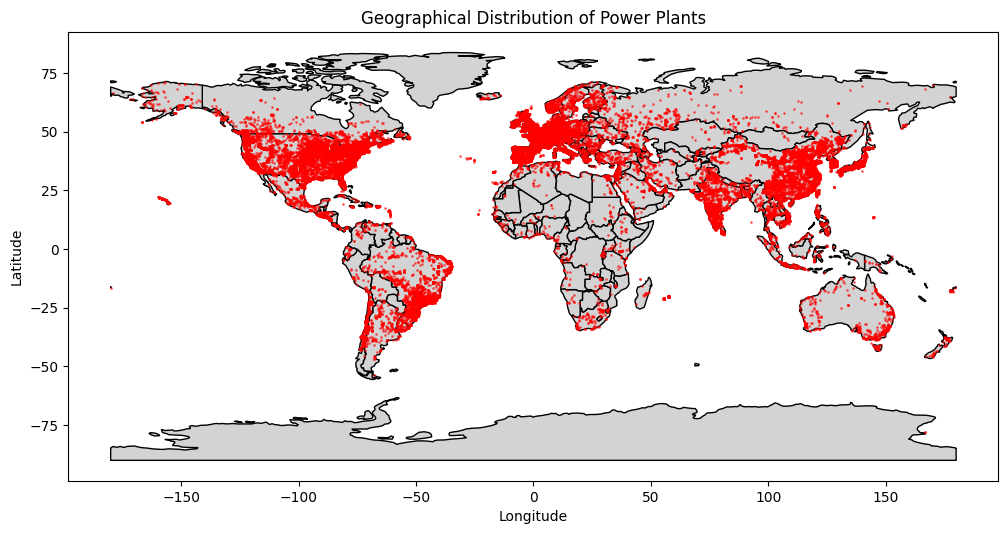

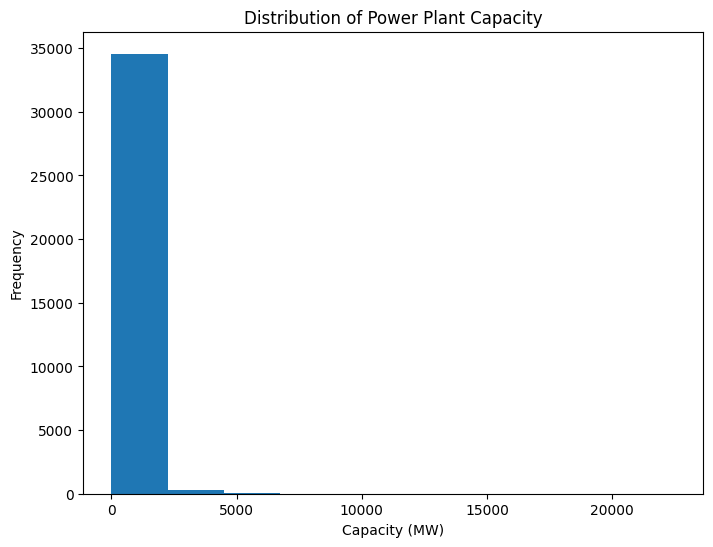

In [17]:
# 1. Complex Filtering in Pandas with NumPy:

# Filter power plants with capacity > 1000 MW and using coal or gas
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')
filtered_df = df[np.logical_and(df['capacity_mw'] > 1000,
                               np.logical_or(df['primary_fuel'] == 'Coal', df['primary_fuel'] == 'Gas'))]
print(filtered_df.head())

# 2. Sophisticated Plots in Matplotlib with NumPy:

# Create a scatter plot of capacity vs. estimated annual generation, colored by fuel type
plt.figure(figsize=(10, 6))
for fuel_type in df['primary_fuel'].unique():
    subset = df[df['primary_fuel'] == fuel_type]
    # Check for typos and correct the column name if necessary
    plt.scatter(subset['capacity_mw'], subset['estimated_generation_gwh_2017'], label=fuel_type, alpha=0.7)
plt.title('Capacity vs. Estimated Generation by Fuel Type')
plt.xlabel('Capacity (MW)')
plt.ylabel('Estimated Generation (GWh)')
plt.legend()
plt.grid(True)
plt.show()

# Geographical distribution of power plants using Geopandas and Matplotlib
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Create a histogram of power plant capacity, using NumPy for bin edges
plt.figure(figsize=(8, 6))
hist, bins = np.histogram(df['capacity_mw'].dropna(), bins=10)
plt.bar(bins[:-1], hist, width=bins[1] - bins[0], align='edge')
plt.title('Distribution of Power Plant Capacity')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()